**Capstone - Credit Card Fraud Detection**

Contributed By : Somvir Singh
Batch: ML C-45 Email ID: somvirnain2018@gmail.com

# **Introduction:**

To increase financial security, the Credit Card Fraud Detection project makes use of state-of-the-art machine learning and data analysis techniques. Its primary goal is to develop a prediction system that can proactively distinguish between legitimate and fraudulent credit card transactions. This study overcomes the constraints of conventional rule-based systems by addressing the dynamic nature of fraud trends through the use of machine learning, specifically supervised learning and anomaly detection. Preprocessing data, feature engineering, choosing a model, and evaluation metrics are important elements. To find the best method for detecting fraud, machine learning methods such as logistic regression, decision trees, random forests, and support vector machines are explored. The project's ultimate goal is to provide a dependable, efficient, and adaptable method of safeguarding financial transactions from the wide range of fraudulent conduct that is always evolving.

Project Objectives
The purpose of this project is to forecast fraudulent credit card transactions using machine learning algorithms. The technique often involves preprocessing and dataset exploration. The dataset could include details about the history, location, timing, and amount of transactions. Once the information has been split into training and testing sets, a number of machine learning algorithms, such as logistic regression, decision trees, random forests, and support vector machines, can be used to develop predictive models.

The models are trained using a labelled dataset that includes examples of both fraudulent and non-fraudulent transactions. Evaluation measures like precision, recall, and the F1 score are commonly used to assess a model's performance. Examples of continual improvement include studying more complex techniques like anomaly detection, altering hyperparameters, and using ensemble methodologies.  The final model aims to accurately identify and halt fraudulent credit card transactions by utilising patterns from historical data.
# **Problem Statement:**
The project's chosen problem statement is to use machine learning models to predict fraudulent credit card transactions. In this project, WE will be examining customer-level data that has been gathered and examined as part of a Worldline and Machine Learning Group research cooperation.
Retaining highly profitable clients is the primary business objective for many banks. For some banks, however, this objective is seriously threatened by banking fraud. Regarding significant monetary losses, credibility, and trust, this is a worry for banks as well as customers.
It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.
In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

# **Understanding and Defining Fraud Logic**
Credit card fraud is any dishonest act or behavior to obtain information without proper authorization from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:
•	Manipulation/alteration of genuine cards
•	Creation of counterfeit cards
•	Stealing/loss of credit cards
•	Fraudulent telemarketing
# **About the Dataset**
•	The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building. The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.
•	Given the class imbalance ratio, we recommend measuring accuracy using the Area under the Precision-Recall Curve (AUPRC). The confusion matrix accuracy is not meaningful for unbalanced classification.
# **Metrics Used**
# **ROC-AUC Score**
•	A commonly employed statistic for evaluating the efficacy of binary classifiers is the ROC-AUC score, which stands for Receiver Operating Characteristic - Area under the Curve. Models that are able to distinguish between positive and negative classes are assessed by calculating the area under the receiver operating characteristic curve. The ROC-AUC score can be a helpful tool for unbalanced datasets since it is not affected by class imbalance. Therefore, the ROC-AUC score will continue to provide a reliable indication of the model's ability to distinguish between the two classes even in situations where the dataset's positive and negative classes are out of balance.
# **F1 Score**
•	It is important to keep in mind that the ROC-AUC score does not provide information regarding the model's exact performance for each class. For example, if one class is significantly smaller than the other, the model may perform well in the larger class but poorly in the smaller one. This might not be seen in the ROC-AUC score. Therefore, it's critical to consider extra measures like accuracy, recall, F1-score, or confusion matrix when evaluating a model's performance on imbalanced datasets. The F1-score is a widely used metric to evaluate the performance of binary classifiers. It provides a score that combines recall and precision to indicate the model's overall accuracy.
# **Precision**
•	The precision of a classification or prediction model is a measure of its accuracy. It is the ratio of the total number of false positives (positive instances incorrectly predicted) to the number of true positives (positive cases properly predicted) in the model's output. In other words, accuracy determines the proportion of favorable circumstances that are truly expected to be favorable. A high precision indicates that a model finds affirmative situations very well and that there aren't many false positives in its output. Conversely, low precision suggests a higher rate of false positives in the model, which could lead to erroneous or deceptive conclusions..
# **Recall**
•	The completeness of a categorization or prediction model is gauged by recall. In the model's output, it is defined as the ratio of true positives (positive cases that were correctly predicted) to the total of true positives and false negatives (positive cases that were missed). Put differently, recall quantifies the percentage of real positive cases that the model accurately recognizes. A high recall means that few positive examples are overlooked by the model, demonstrating its excellent ability to recognize positive situations. Conversely, a low recall indicates a larger likelihood of missing positive cases in the model, which may potentially produce inaccurate or deceptive results.


In [1]:
# Importing computational packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Let's mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Importing our data which has been downloaded from Kaggle
file_path = '/content/gdrive/MyDrive/UPGRAD/CAPSTONE/Data/creditcard.csv'
df = pd.read_csv(file_path)

## Exploratory data analysis

In [4]:
#Let's have a look at the database
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Let us observe the different feature types present in the data
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

### Handling Missing Values

In [8]:
# Let us check for the missing values present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that there is no missing value present in the dataframe.

### Outliers treatment

We have been told that the whole dataset is transformed with PCA, so we can assume that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe.

### Observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

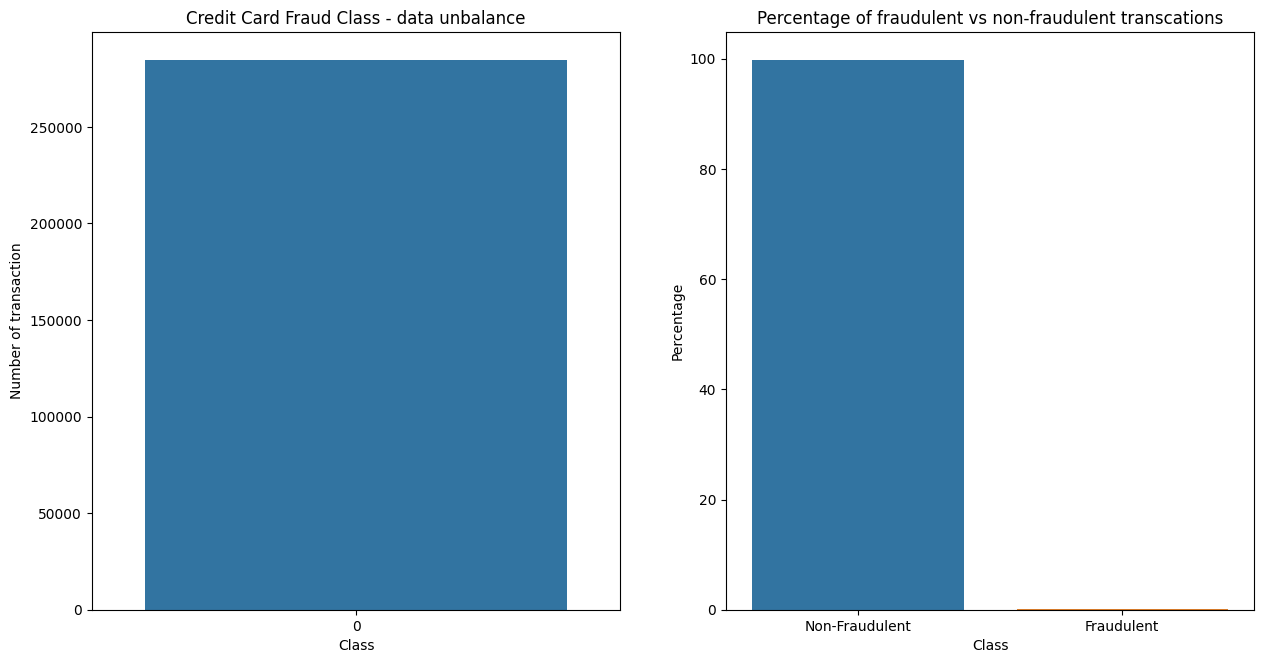

In [10]:
# Let us now create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

**Observation**

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

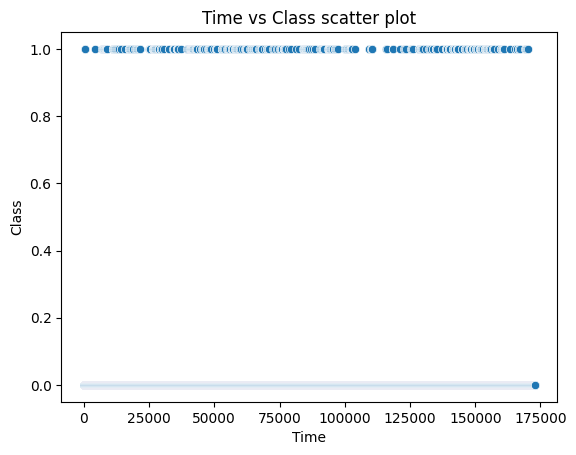

In [11]:
# Creating a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df["Time"], y=df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

**Observation**

There is not much insight that can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

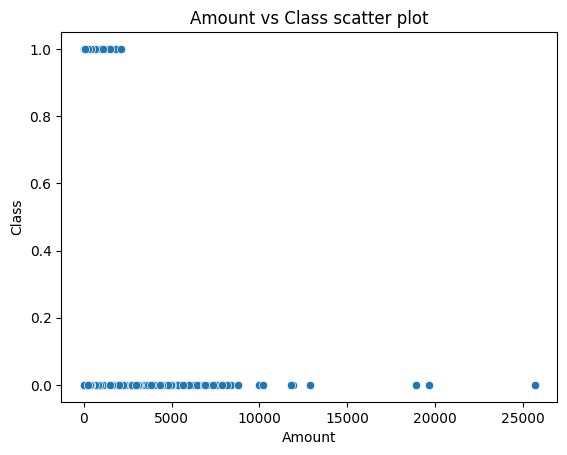

In [12]:
# Creating a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df["Amount"], y=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

**Observation**

Clearly low amount transactions are more likely to be fraudulent than high amount transactions.

Dropping `Time` column as this feature is not going to help in the model building.

In [13]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

#### Plotting the distributions of all the featuers

<Figure size 640x480 with 0 Axes>

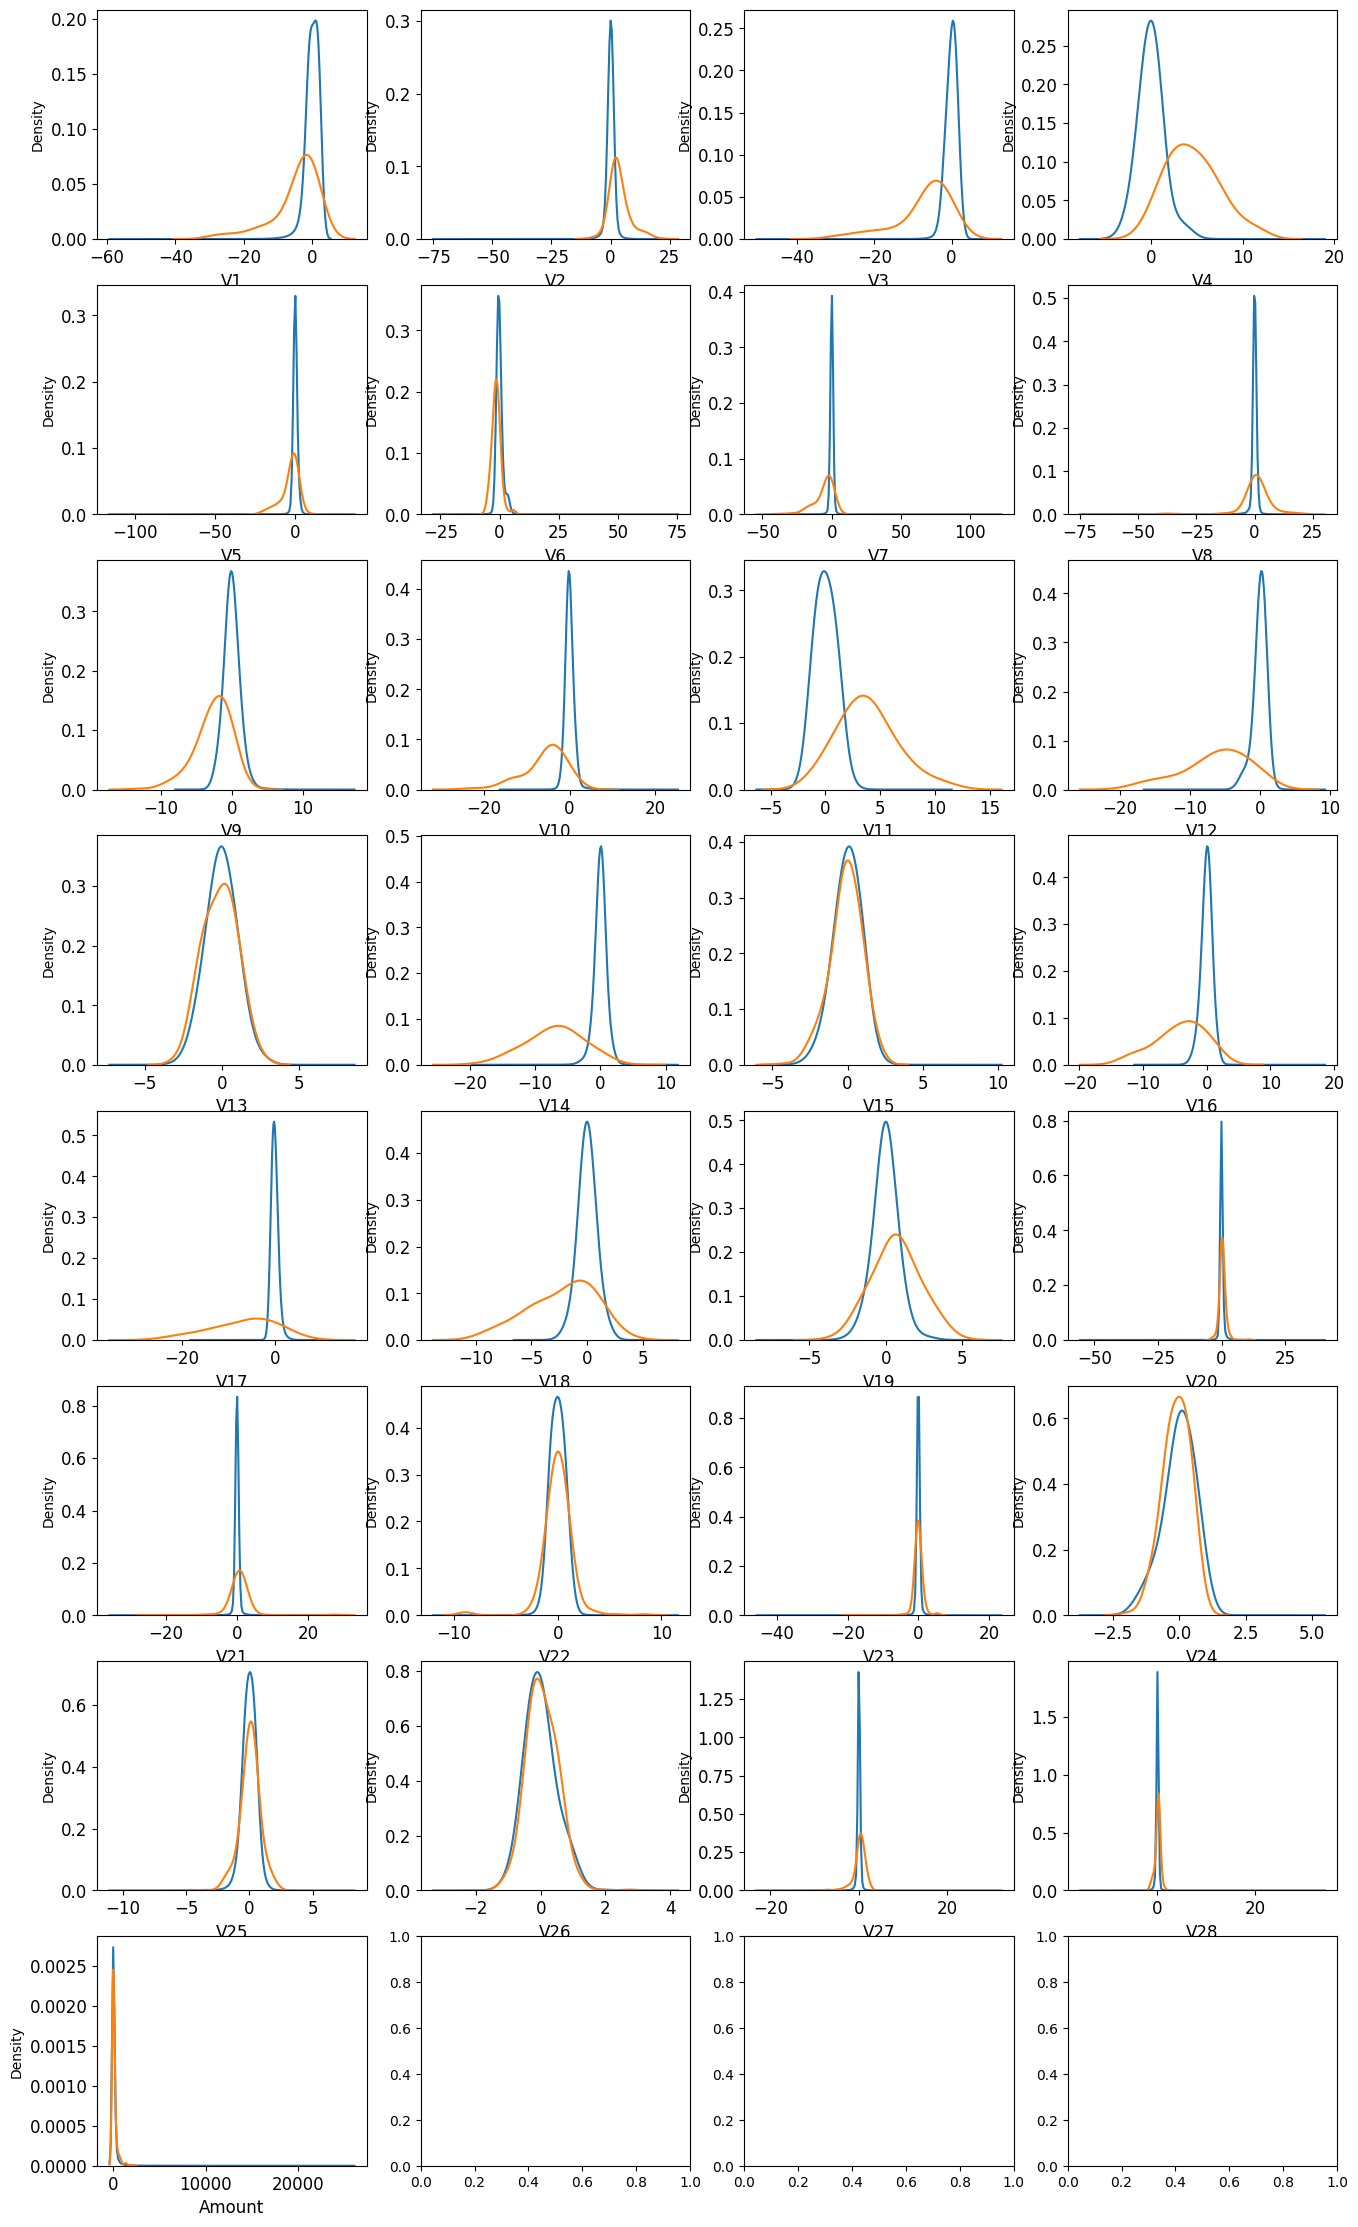

In [14]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

### Splitting the data into train & test data

In [15]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [16]:
# Spltting the data into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [17]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Feature Scaling using Standard Scaler

We need to scale `Amount` column.

In [18]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only the Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [19]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [20]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


### Plotting the distribution of a variable to handle skewness

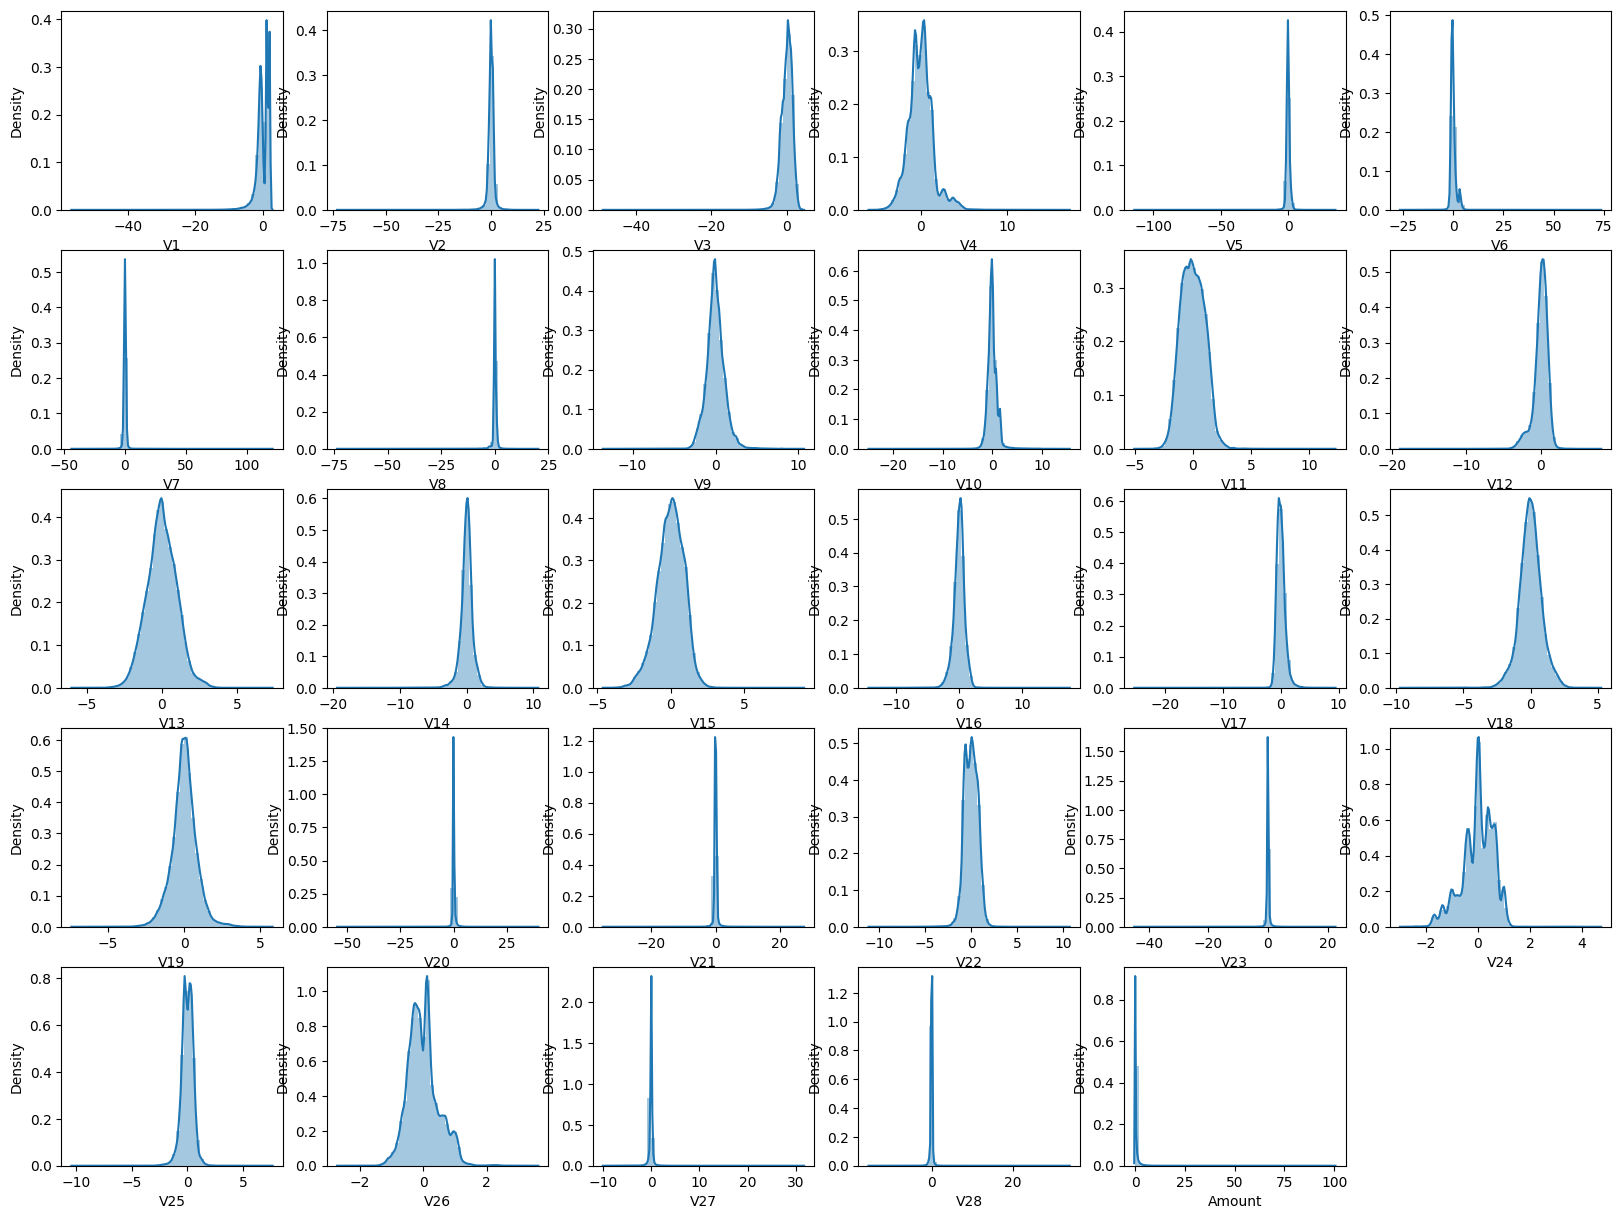

In [21]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [22]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,0.359527,-2.281334,0.067612,-1.992812,-0.308053,-1.113875,-3.975821,-0.266115,0.107289,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [23]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


### There is skewness present in the distribution of the above features:
- Power Transformer package present in the <b>preprocessing library provided by sklearn</b> is used to make the distribution more gaussian

In [24]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

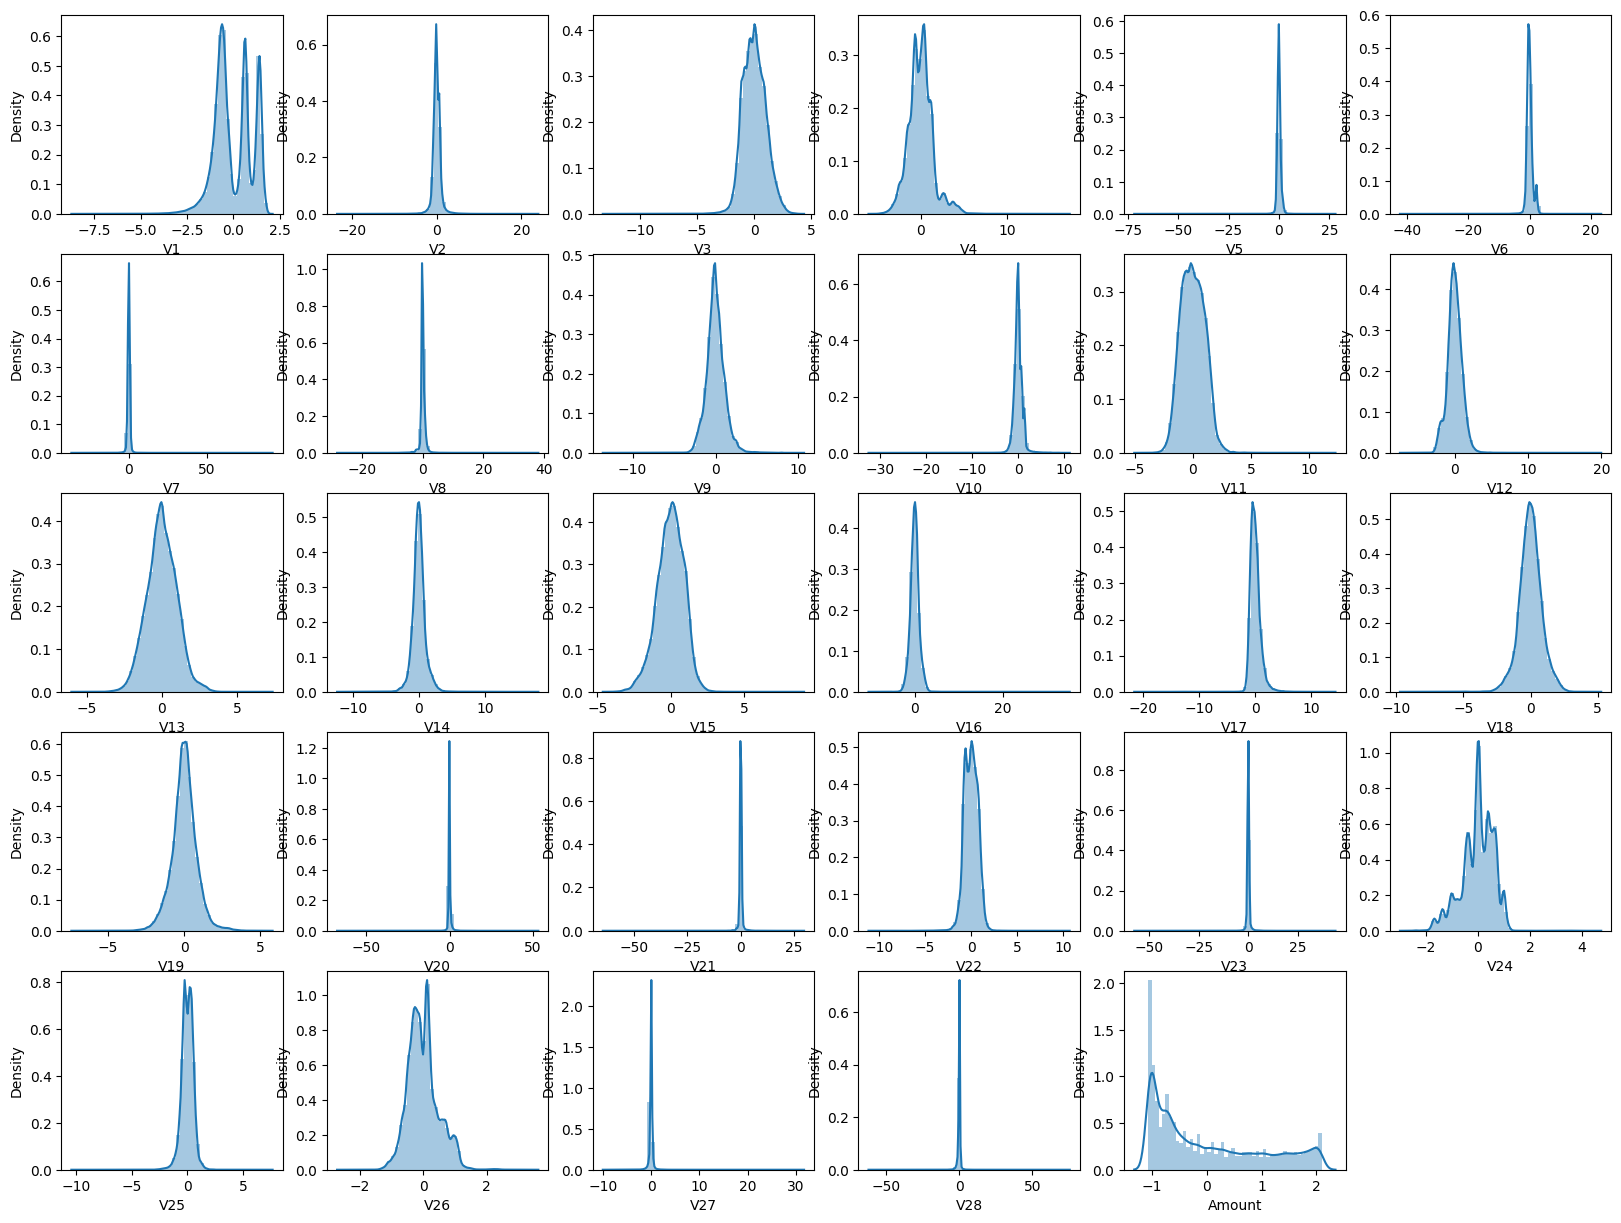

In [25]:
# plot the histogram of a variable from the dataset again to see the result
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building with imbalanced data
The following algorithms will be used to generate models, which we will then compare to determine which model performs the best. When creating models, we avoid using SVM, RandomForest, or KNN since they are computationally intensive and need a lot of processing power, especially SVM and KNN. KNN algorithms measure the separation between every data point, and then they repeat this calculation for every data point to find the nearest neighbour. When dealing with large data sets, this strategy becomes computationally expensive. Since we do not currently having these resources available, we are leaving these models out.
- Logistic Regression
- Decision Tree
- XGBoost

#### Metric selection on imbalance data
For the purpose of evaluating the model, we will employ the ROC-AUC score as the assessment metric. Since there are very few fraud incidents overall and the data is very skewed, accuracy is not the appropriate statistic to assess the model.

In [26]:
# Class imbalance
y_train.value_counts()/y_train.shape

0    0.998271
1    0.001729
Name: Class, dtype: float64

### 1. Logistic Regression

In [27]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9808868419804181
Best hyperparameters:  {'C': 0.01}


In [28]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.811924,0.568927,0.076067,0.011731,0.01,{'C': 0.01},0.968649,0.987418,0.991888,0.972320,0.984158,0.980887,0.008917,1,0.986560,0.981838,0.980641,0.986508,0.981480,0.983405,0.002584
1,3.152952,0.190349,0.053682,0.011033,0.1,{'C': 0.1},0.969796,0.982755,0.988625,0.964694,0.980026,0.977179,0.008725,2,0.983257,0.978596,0.977881,0.985034,0.979206,0.980795,0.002824
2,2.379381,0.212748,0.031978,0.000990,1,{'C': 1},0.970928,0.981696,0.987179,0.962764,0.978303,0.976174,0.008526,3,0.982013,0.977514,0.977196,0.984493,0.978452,0.979934,0.002851
3,3.383838,0.629892,0.058598,0.023418,10,{'C': 10},0.971130,0.981564,0.986990,0.962537,0.978079,0.976060,0.008497,4,0.981847,0.977373,0.977123,0.984424,0.978355,0.979824,0.002854
4,3.277271,0.475016,0.047323,0.014362,100,{'C': 100},0.971157,0.981549,0.986970,0.962509,0.978058,0.976048,0.008495,5,0.981831,0.977356,0.977118,0.984419,0.978347,0.979814,0.002854
5,2.369756,0.282143,0.031493,0.006885,1000,{'C': 1000},0.971160,0.981549,0.986964,0.962506,0.978055,0.976047,0.008494,6,0.981829,0.977357,0.977113,0.984418,0.978345,0.979812,0.002855


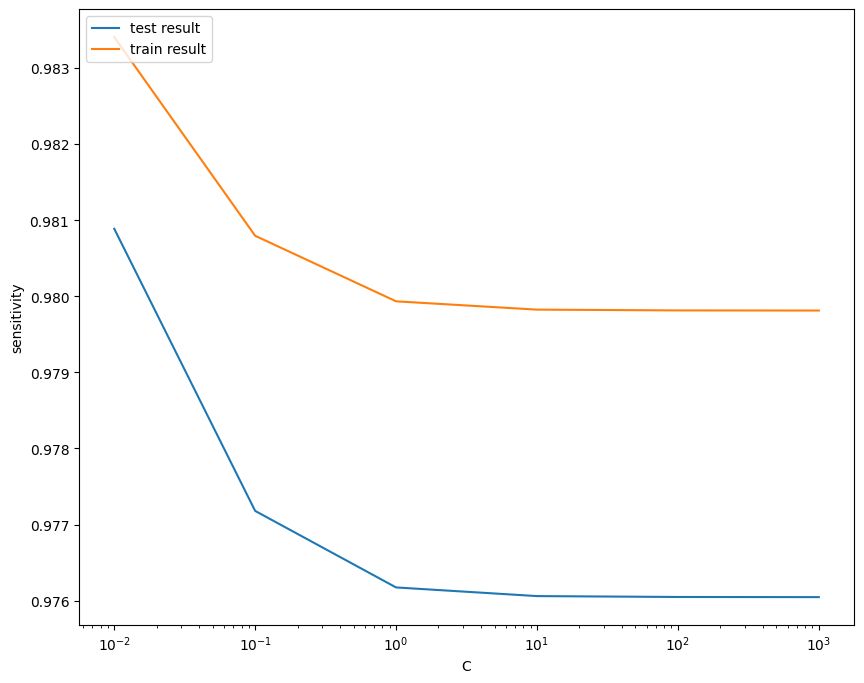

In [29]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [30]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Prediction and model evalution on the train set

In [31]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [32]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [33]:
display_scores(y_train, y_train_pred)

F1 Score: 73.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [34]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [35]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

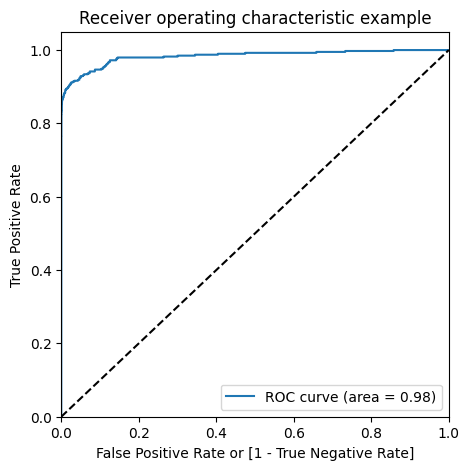

In [36]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [37]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 70.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

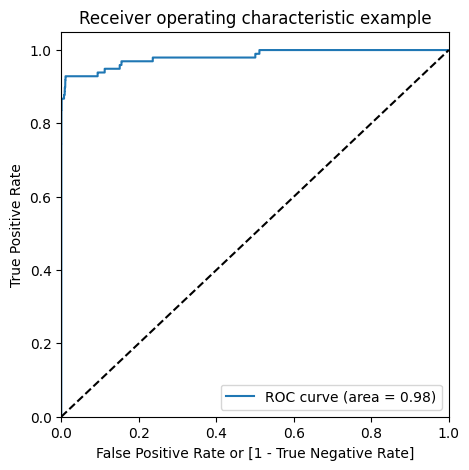

In [39]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see very good ROC on the test data set 0.98.

#### Model Summary

- Train set
    - ROC : 98%
    - F1 Score: 73.76%
    
- Test set
    - ROC : 98%
    - F1 score: 70.3%

### 2. Decision Tree

In [40]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [41]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.713653,2.081011,0.053398,0.021569,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.927349,0.951700,0.930558,0.016113,5
1,9.789031,1.893724,0.082959,0.027333,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912643,0.927349,0.951699,0.930564,0.016106,4
2,7.646296,0.760721,0.050356,0.021860,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
3,10.045364,2.291842,0.068220,0.018629,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
4,14.889884,1.207696,0.082403,0.019320,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934905,0.923880,0.915736,0.924840,0.007855,7
5,17.383851,0.949594,0.041800,0.002249,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934938,0.916384,0.915759,0.922360,0.008898,8
6,15.675074,1.121889,0.077070,0.019770,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948467,0.930698,0.908131,0.929098,0.016506,6
7,16.292975,1.480005,0.056338,0.023473,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948446,0.930680,0.915628,0.931584,0.013413,3


In [42]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9338362614319525
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree with optimal hyperparameters

In [43]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Prediction on the train set

In [44]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 72.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



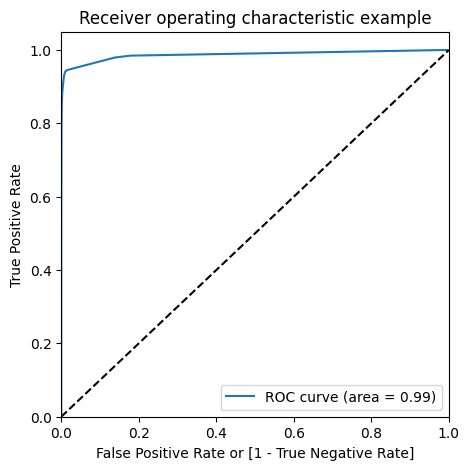

In [45]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [46]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



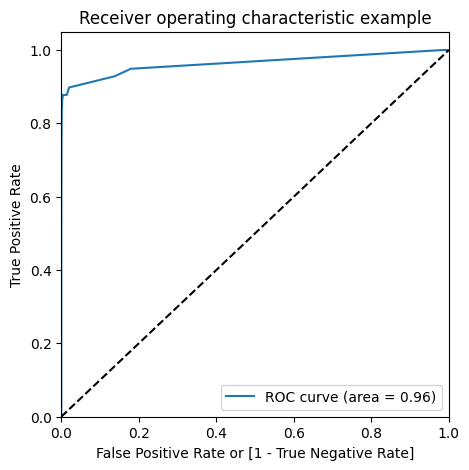

In [47]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC Score: 99%
    - F1 score : 72.33%
    
- Test set
    - ROC Score: 96%
    - F1 score : 71.88%

### 3. XGBoost

In [48]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [49]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.357070,2.518593,0.134884,0.001923,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968831,0.960607,0.986866,0.972101,0.010967,6,0.999832,0.999843,0.999686,0.999787,0.000071
1,10.984584,2.105854,0.229459,0.083082,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.975385,0.983747,0.987352,0.982161,0.005013,2,0.999883,0.999946,0.999879,0.999902,0.000031
2,6.090387,3.705067,0.138679,0.000697,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980065,0.976040,0.988241,0.981449,0.005076,3,0.999931,0.999922,0.999836,0.999896,0.000042
3,6.315276,3.676983,0.139661,0.000349,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.974193,0.962130,0.983242,0.973189,0.008648,5,0.999997,0.999979,0.999995,0.999990,0.000008
4,6.218573,3.603183,0.140386,0.003076,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.978817,0.965375,0.980272,0.974821,0.006706,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,6.158726,3.781341,0.140137,0.005797,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.984408,0.978815,0.985159,0.982794,0.002830,1,1.000000,1.000000,1.000000,1.000000,0.000000


In [50]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.982793816632015
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [51]:
# Printing best parameters
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

#### XGBoost model with optimal hyperparameter

In [52]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Model evaluation on train set

In [53]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



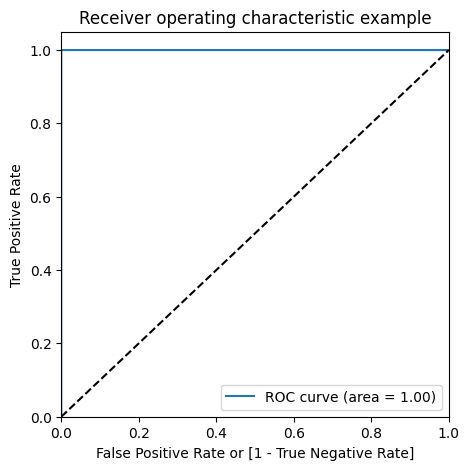

In [54]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Evaluating the model on the test set

In [55]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.64%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



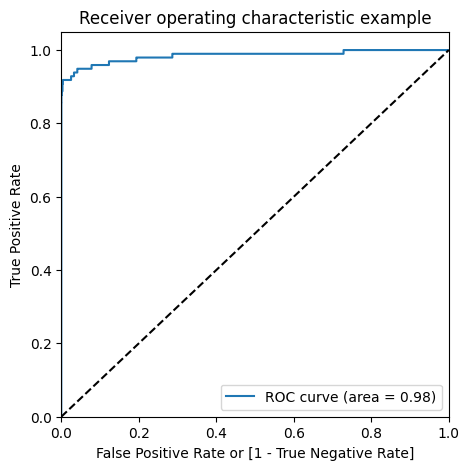

In [56]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 100.0%
- Test set
    - ROC score: 98%
    - F1 score: 87.64%

**Out of these three models, the XGBoost model performs well on unbalanced data. With train data, the ROC-AUC score is 100%, while with test data, it is 98%.**

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


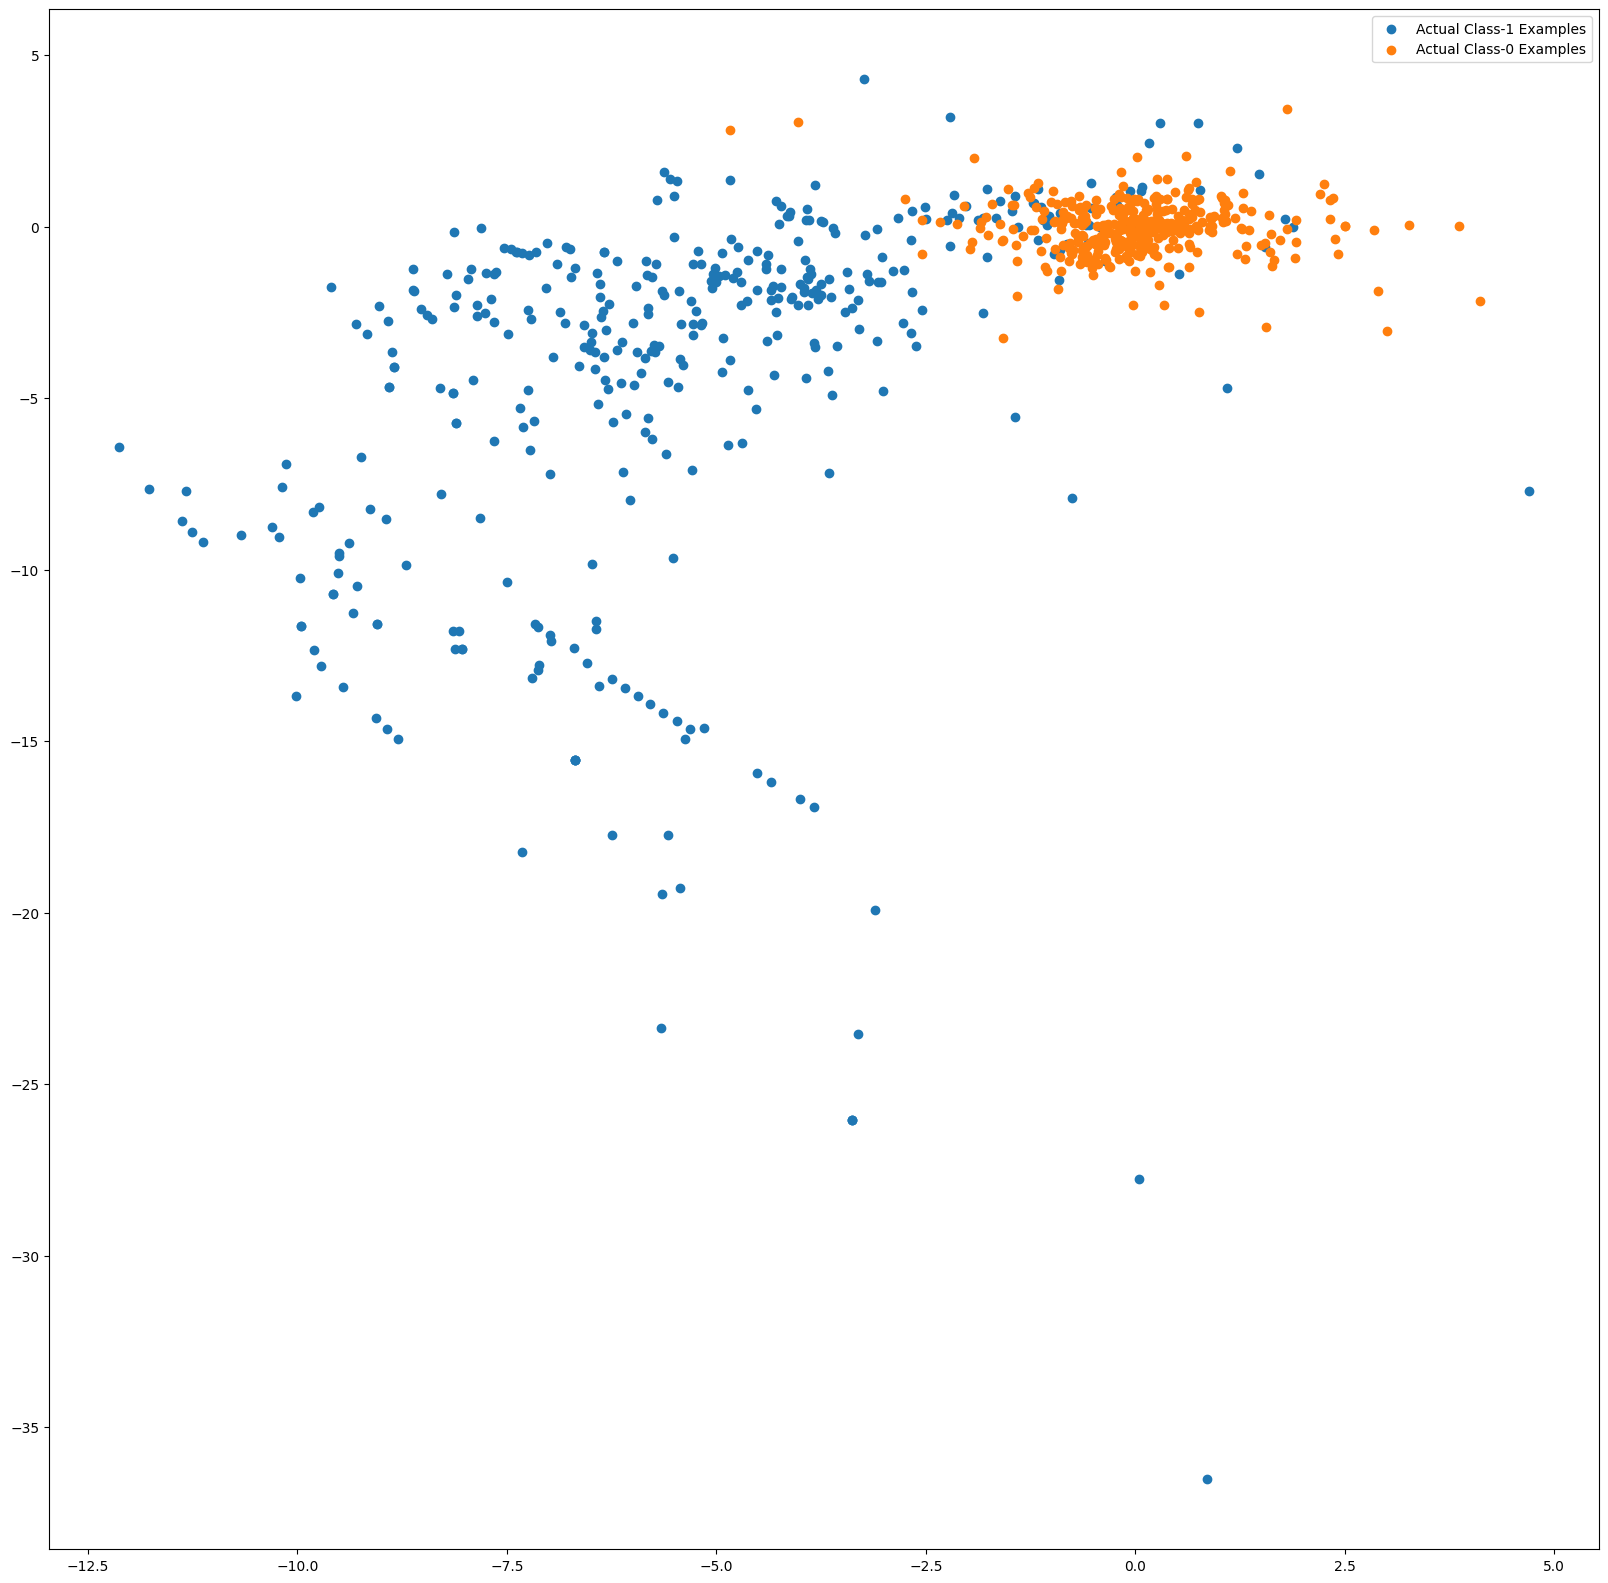

In [57]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [58]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.81609064


We can see that the threshold is 0.816, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

> Indented block



## Model building with balancing Classes

We are going to perform below over sampling approaches for handling data imbalance and we will pick the best approach based on model performance.
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [59]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [60]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 1. Logistic Regrassion with Random Oversampling

In [61]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9869116179810498
Best hyperparameters:  {'C': 1000}


In [62]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.189417,0.756242,0.068293,0.024946,0.01,{'C': 0.01},0.986432,0.986728,0.987277,0.986859,0.986519,0.986763,0.000298,6,0.986877,0.986754,0.986613,0.986774,0.986865,0.986777,0.000095
1,3.183135,0.667818,0.054967,0.014383,0.1,{'C': 0.1},0.986563,0.986855,0.987405,0.986982,0.986671,0.986895,0.000293,5,0.987008,0.986887,0.986742,0.986901,0.986999,0.986908,0.000096
2,3.263493,1.041366,0.060886,0.018872,1,{'C': 1},0.986579,0.986867,0.987424,0.986992,0.986686,0.986910,0.000294,4,0.987022,0.986905,0.986755,0.986916,0.987015,0.986923,0.000097
3,3.573729,0.686715,0.077234,0.025320,10,{'C': 10},0.986581,0.986867,0.987426,0.986993,0.986690,0.986911,0.000294,3,0.987023,0.986905,0.986756,0.986917,0.987017,0.986924,0.000097
4,3.574674,0.914979,0.071006,0.024484,100,{'C': 100},0.986581,0.986868,0.987426,0.986993,0.986690,0.986912,0.000294,2,0.987023,0.986905,0.986757,0.986917,0.987017,0.986924,0.000097
5,2.999047,0.883882,0.077097,0.032127,1000,{'C': 1000},0.986581,0.986868,0.987426,0.986993,0.986690,0.986912,0.000294,1,0.987023,0.986905,0.986757,0.986917,0.987017,0.986924,0.000097


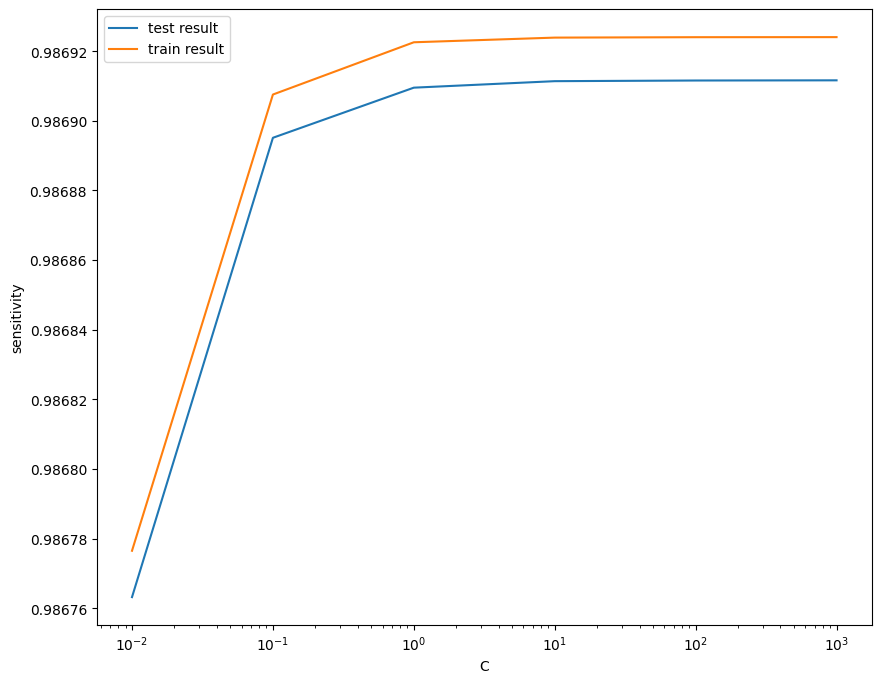

In [63]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with hyperparameter tuning

In [64]:
model_cv.best_params_

{'C': 1000}

In [65]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

#### Evaluating the model on train data

In [66]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [67]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.34%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



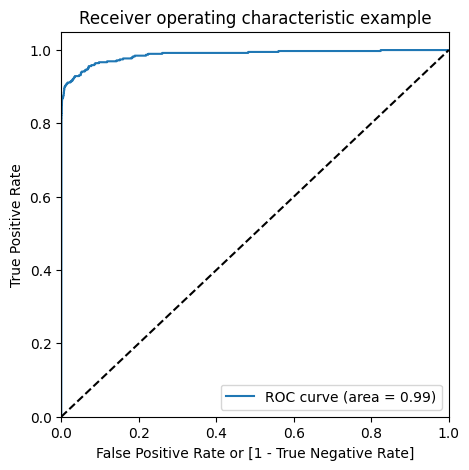

In [68]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [69]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.66%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



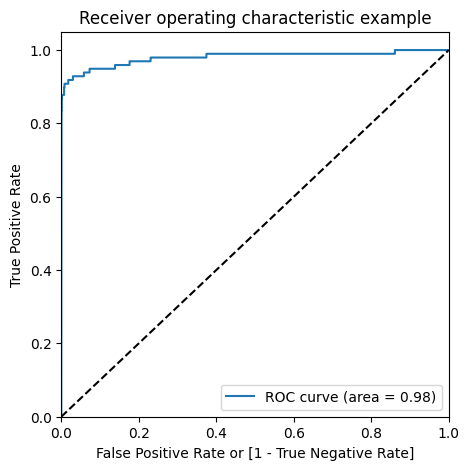

In [70]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.34%
- Test set
    - ROC score : 98%
    - F1 score: 10.66%

### 2. Decision Tree with Random Oversampling

In [71]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [72]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.999052842640276
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### Decision Tree with optimal hyperparameters

In [73]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Model evatuation on train data

In [74]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.43%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



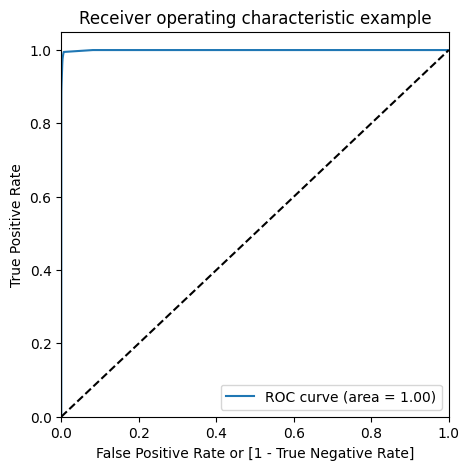

In [75]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [76]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 29.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.82      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.65     56962
weighted avg       1.00      0.99      1.00     56962



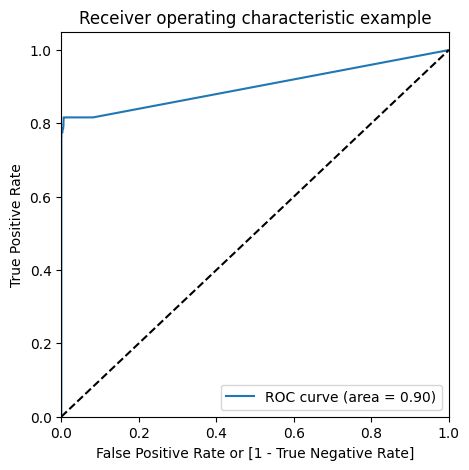

In [77]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.43%
- Test set
    - ROC score : 90%
    - F1 score: 29.52%

### 3. XGBoost with Random Oversampling

In [78]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_over, y_over)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [79]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.529448,2.960202,0.326173,0.104996,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999854,0.999859,0.999862,0.999858,3.229618e-06,5,0.999872,0.999872,0.999878,0.999874,0.000003
1,11.600436,3.634440,0.260993,0.003202,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999862,0.999859,0.999849,0.999857,5.250722e-06,6,0.999865,0.999883,0.999872,0.999873,0.000008
2,8.663814,3.360194,0.301914,0.070628,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999847,0.999863,0.999868,0.999859,9.120565e-06,4,0.999859,0.999875,0.999875,0.999870,0.000008
3,12.474598,2.996510,0.334476,0.118112,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999973,0.999983,0.999965,0.999974,7.078048e-06,1,0.999995,0.999993,0.999996,0.999995,0.000001
4,8.920352,3.008334,0.368286,0.081539,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999968,0.999971,0.999970,0.999969,9.095995e-07,3,0.999996,0.999991,0.999995,0.999994,0.000002
5,10.670454,2.907218,0.311924,0.085466,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999975,0.999970,0.999974,0.999973,2.213666e-06,2,0.999998,0.999993,0.999994,0.999995,0.000002


In [80]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999737469919521
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [81]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

#### XGBoost with optimal hyperparameter

In [82]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Model evatuation on train data

In [83]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



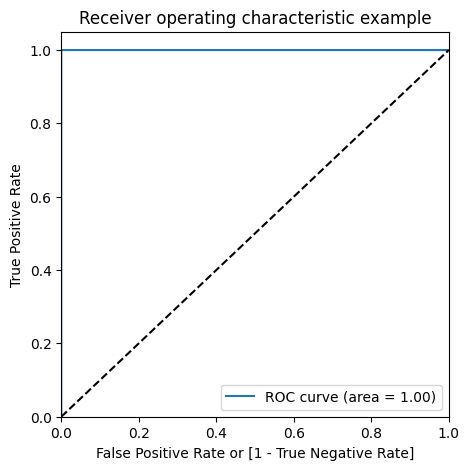

In [84]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Model evaluation on the test set

In [85]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 88.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.83      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



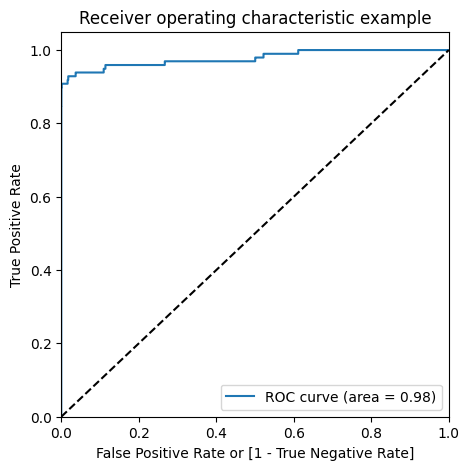

In [86]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 98%
    - F1 score: 88.52%

## SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE

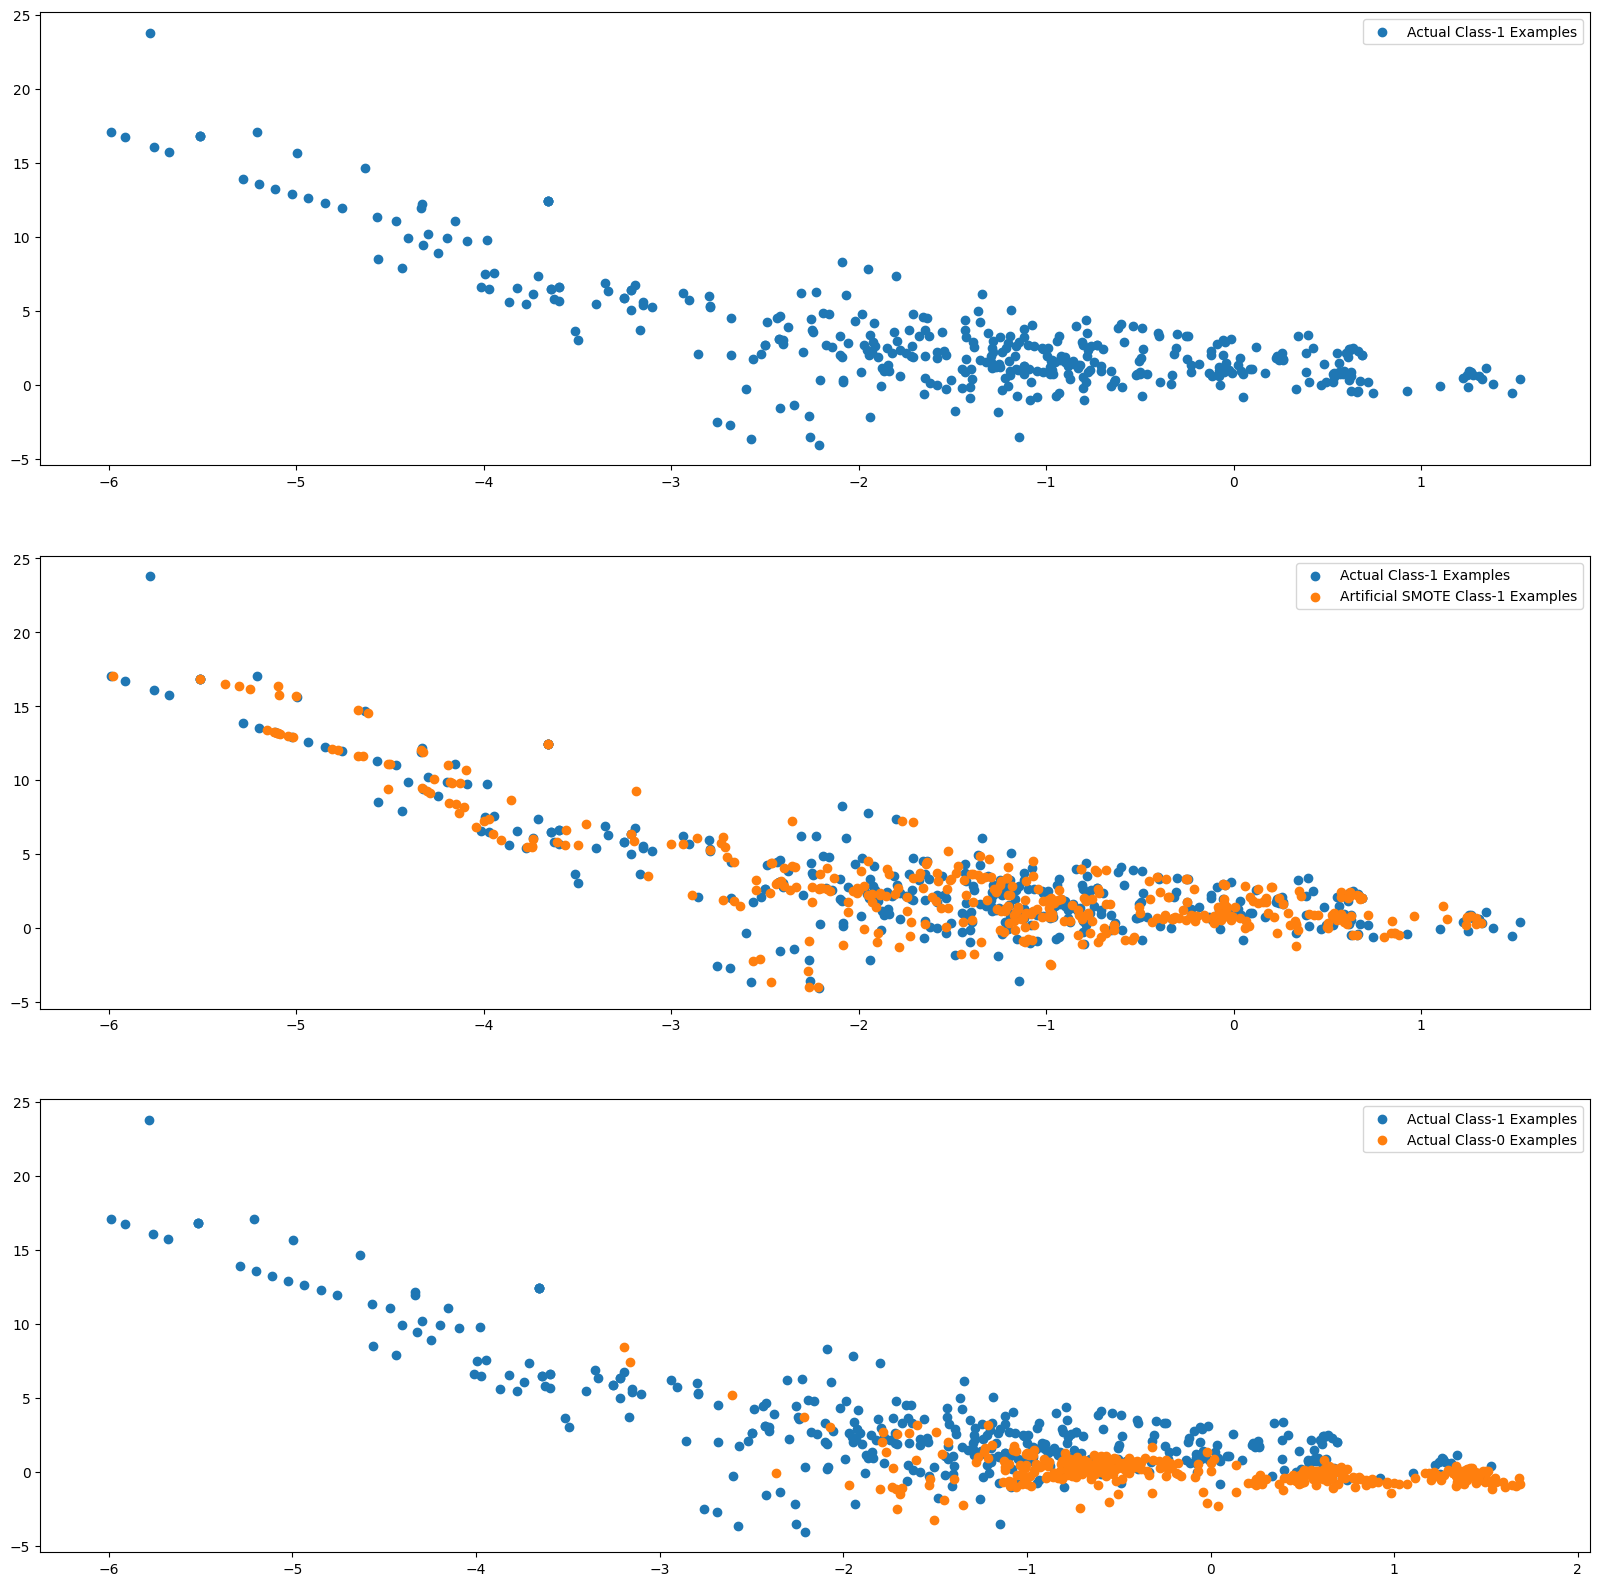

In [87]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced data with SMOTE

In [88]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9889852511786869
Best hyperparameters:  {'C': 100}


In [89]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.923186,0.770000,0.080893,0.032927,0.01,{'C': 0.01},0.988651,0.989120,0.989007,0.988704,0.988881,0.988873,0.000177,6,0.988979,0.988788,0.988797,0.988914,0.988955,0.988887,0.00008
1,3.425556,0.752709,0.082612,0.026816,0.1,{'C': 0.1},0.988757,0.989219,0.989093,0.988807,0.988993,0.988974,0.000173,5,0.989079,0.988894,0.988893,0.989012,0.989060,0.988987,0.00008
2,4.738163,1.358474,0.100423,0.034108,1,{'C': 1},0.988768,0.989229,0.989101,0.988817,0.989005,0.988984,0.000172,4,0.989089,0.988905,0.988903,0.989022,0.989071,0.988998,0.00008
3,3.253874,0.920830,0.062023,0.020428,10,{'C': 10},0.988769,0.989230,0.989102,0.988818,0.989006,0.988985,0.000172,3,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
4,5.296828,1.020486,0.096264,0.042365,100,{'C': 100},0.988769,0.989230,0.989102,0.988818,0.989006,0.988985,0.000172,1,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
5,3.423576,0.868500,0.074302,0.026380,1000,{'C': 1000},0.988769,0.989230,0.989102,0.988818,0.989006,0.988985,0.000172,2,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008


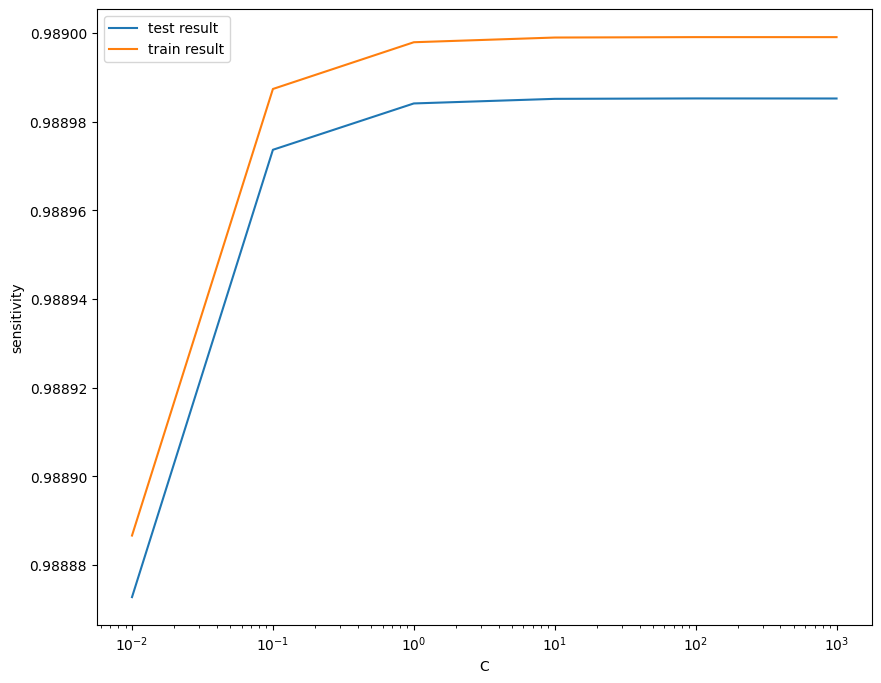

In [90]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [91]:
# Printing best params
model_cv.best_params_

{'C': 100}

In [92]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

#### Evaluating the model on train data

In [93]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.23%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



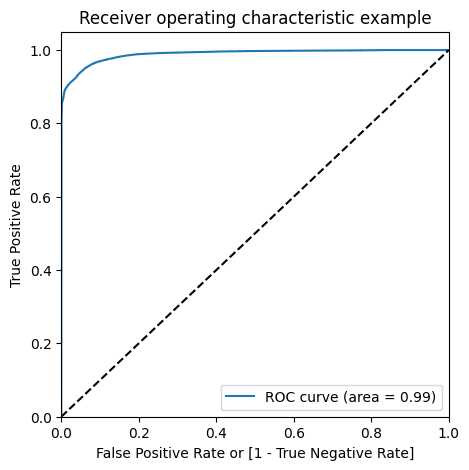

In [94]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### Evaluating on test data

In [95]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.79%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



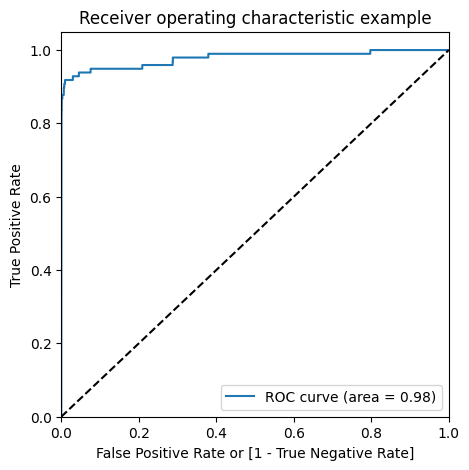

In [96]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

#### 1.Model Summary-Logistic Regression on balanced data with SMOTE
- Train set
    - ROC score : 99%
    - F1 score: 94.23%
- Test set
    - ROC score : 98%
    - F1 score: 9.79%

### 2. Decision Tree on balanced data with SMOTE

In [97]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [98]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9975811046595561
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [99]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [100]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Evaluating the model on train data

In [101]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.61%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



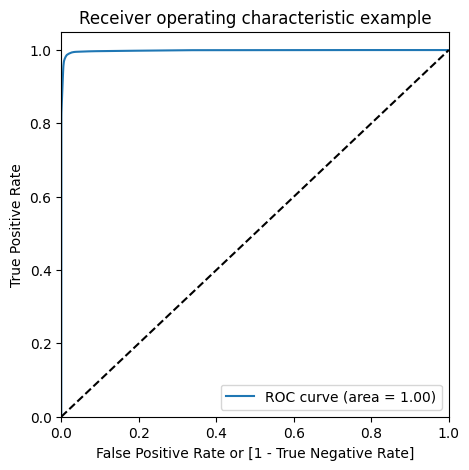

In [102]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [103]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 15.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



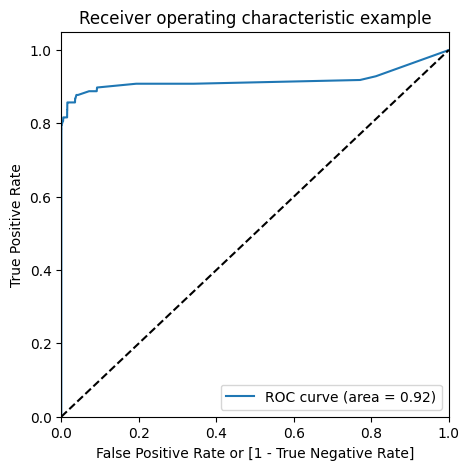

In [104]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

#### 2.Model Summary-Decision Tree on balanced data with SMOTE
- Train set
    - ROC score : 100%
    - F1 score: 98.61%
- Test set
    - ROC score : 92%
    - F1 score: 15.62%

### 3. XGBoost on balanced data with SMOTE

In [105]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [106]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.550819,2.097688,0.334846,0.093389,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999511,0.999556,0.999494,0.999520,0.000026,5,0.999570,0.999553,0.999534,0.999552,0.000015
1,11.936502,3.653331,0.269986,0.008500,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999512,0.999544,0.999543,0.999533,0.000015,4,0.999577,0.999548,0.999580,0.999569,0.000014
2,10.507479,0.912402,0.401193,0.097194,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999495,0.999567,0.999483,0.999515,0.000037,6,0.999561,0.999567,0.999531,0.999553,0.000016
3,9.945619,3.408871,0.275556,0.008367,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999907,0.999922,0.999942,0.999924,0.000014,3,0.999962,0.999955,0.999968,0.999962,0.000005
4,11.677018,2.287668,0.341329,0.103429,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999923,0.999930,0.999940,0.999931,0.000007,1,0.999966,0.999959,0.999963,0.999963,0.000003
5,11.162549,2.352227,0.408184,0.102175,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999923,0.999929,0.999936,0.999929,0.000005,2,0.999955,0.999961,0.999963,0.999960,0.000004


In [107]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999310003781012
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Model with optimal hyperparameter

In [108]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [109]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### Evaluating the model on the train data

In [110]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



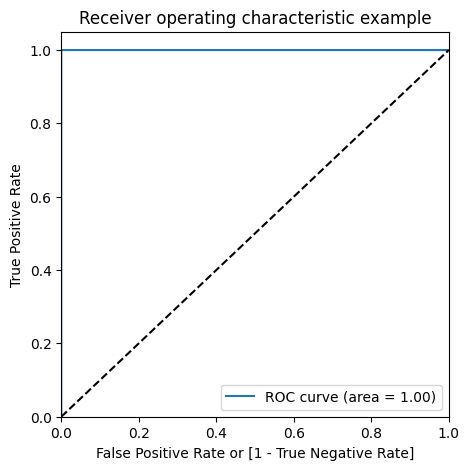

In [111]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on test data

In [112]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 82.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



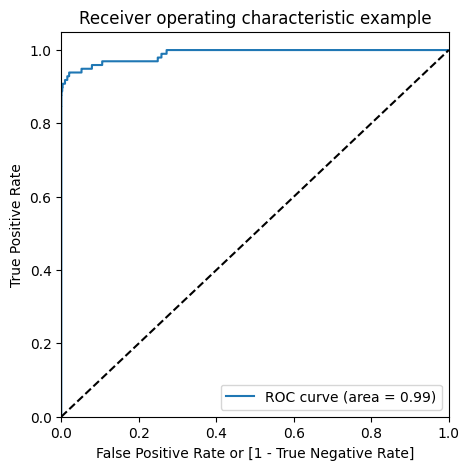

In [113]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### 3. Model Summary-XGBoost on balanced data with SMOTE
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 99%
    - F1 score: 82.52%

## ADASYN (Adaptive Synthetic Sampling)

### Print the class distribution after applying ADASYN

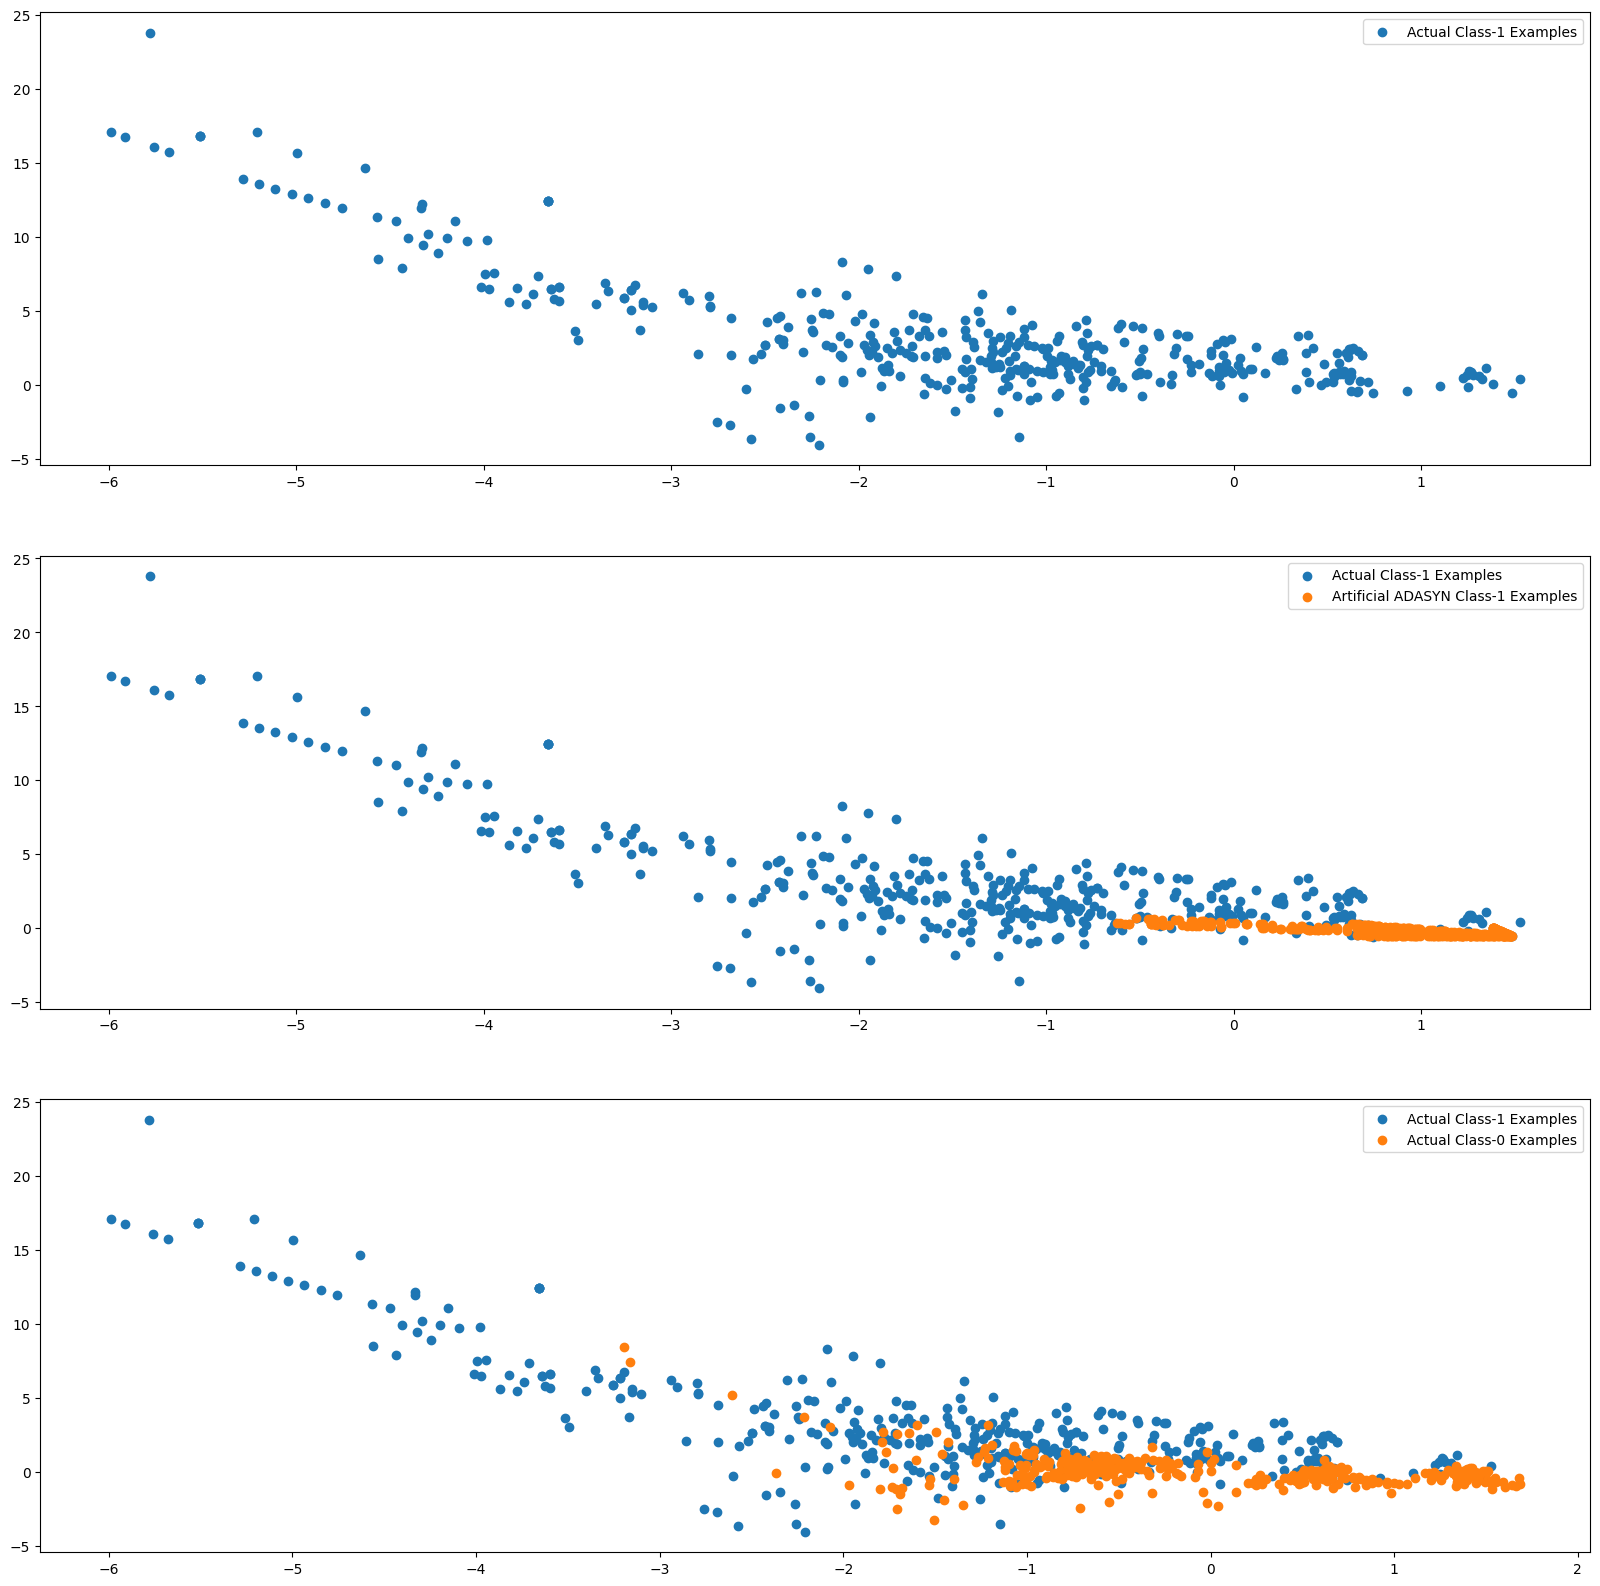

In [114]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced data with ADASYN

In [115]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9616425510525373
Best hyperparameters:  {'C': 1000}


In [116]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.685882,1.227505,0.125730,0.033318,0.01,{'C': 0.01},0.961204,0.961287,0.961636,0.961376,0.000187,6,0.961514,0.961242,0.961433,0.961396,0.000114
1,2.812877,0.514494,0.109300,0.036533,0.1,{'C': 0.1},0.961447,0.961530,0.961883,0.961620,0.000189,5,0.961765,0.961481,0.961674,0.961640,0.000119
2,3.895303,0.334391,0.127376,0.031665,1,{'C': 1},0.961468,0.961550,0.961903,0.961640,0.000188,4,0.961787,0.961501,0.961694,0.961661,0.000119
3,2.642181,0.176185,0.084933,0.001704,10,{'C': 10},0.961470,0.961552,0.961904,0.961642,0.000188,3,0.961789,0.961503,0.961695,0.961662,0.000119
4,4.458016,0.295787,0.122995,0.033127,100,{'C': 100},0.961471,0.961552,0.961904,0.961642,0.000188,2,0.961789,0.961504,0.961696,0.961663,0.000119
5,2.440493,0.182152,0.084960,0.002498,1000,{'C': 1000},0.961471,0.961552,0.961905,0.961643,0.000188,1,0.961789,0.961503,0.961696,0.961663,0.000119


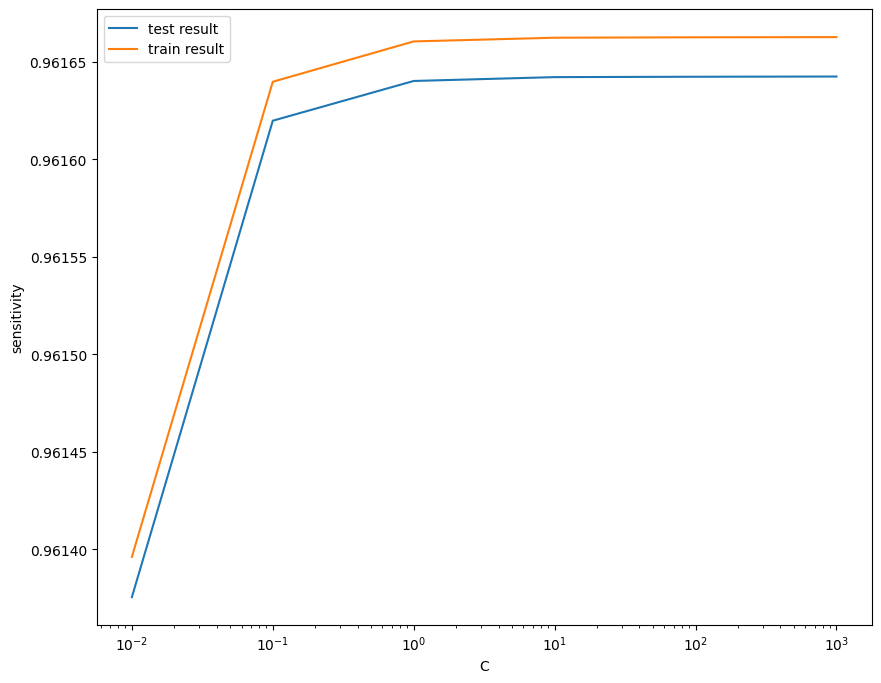

In [117]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [118]:
model_cv.best_params_

{'C': 1000}

In [119]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### Evaluating the model with train data

In [120]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 89.2%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885



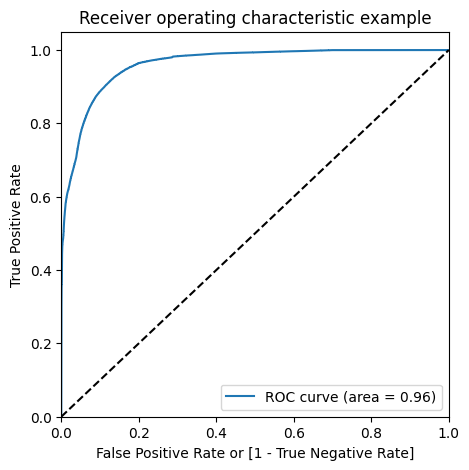

In [121]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating on test data

In [122]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



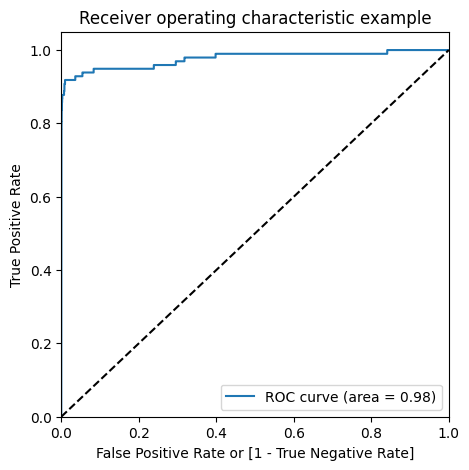

In [123]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 96%
    - F1 score: 89.2%
- Test set
    - ROC score : 98%
    - F1 score: 3.23%

### 2. Decision Tree on balanced data with ADASYN

In [124]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 5,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [125]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9406481874091617
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Model with optimal hyperparameters

In [126]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Evaluating the model on train data

In [127]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.79%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    227451
           1       0.96      1.00      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885



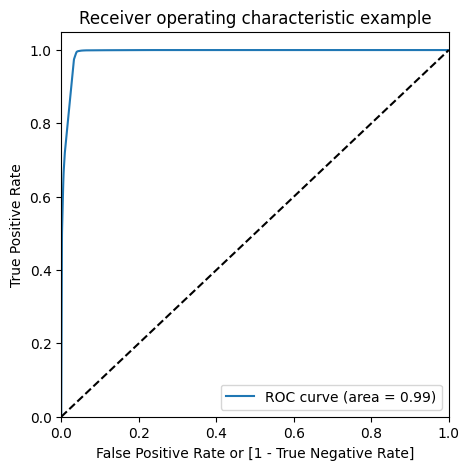

In [128]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [129]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 7.05%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



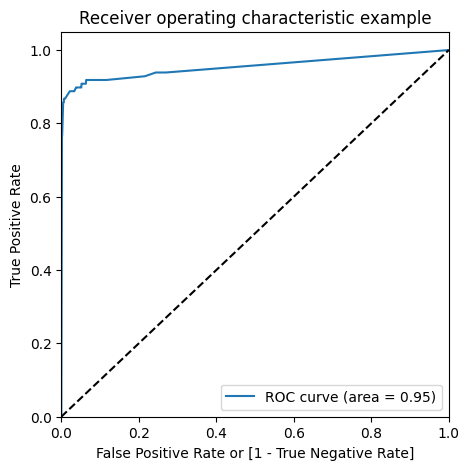

In [130]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 97.79%
- Test set
    - ROC score : 95%
    - F1 score: 7.05%

### 3. XGBoost on balanced data with ADASYN

In [131]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [132]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.880550,3.624865,0.259942,0.004363,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.982385,0.967957,0.995282,0.981874,0.011161,5,0.998848,0.999108,0.998558,0.998838,0.000225
1,11.209671,3.323093,0.269397,0.010077,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982086,0.967306,0.996356,0.981916,0.011860,4,0.998879,0.999095,0.998824,0.998932,0.000117
2,8.477571,3.192737,0.274455,0.034180,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982781,0.965640,0.995983,0.981468,0.012422,6,0.998981,0.998900,0.998709,0.998863,0.000114
3,11.046990,2.114645,0.332366,0.091049,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.992646,0.970869,0.998955,0.987490,0.012032,2,0.999909,0.999890,0.999882,0.999894,0.000011
4,9.710854,0.645430,0.398203,0.107711,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.994269,0.968853,0.998865,0.987329,0.013199,3,0.999921,0.999907,0.999900,0.999909,0.000009
5,9.450733,0.308398,0.308079,0.062310,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.994965,0.970772,0.998563,0.988100,0.012340,1,0.999913,0.999915,0.999894,0.999907,0.000009


In [133]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9881000311196394
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Model with optimal hyperparameter

In [134]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [135]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Evaluating the model on the train data

In [136]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



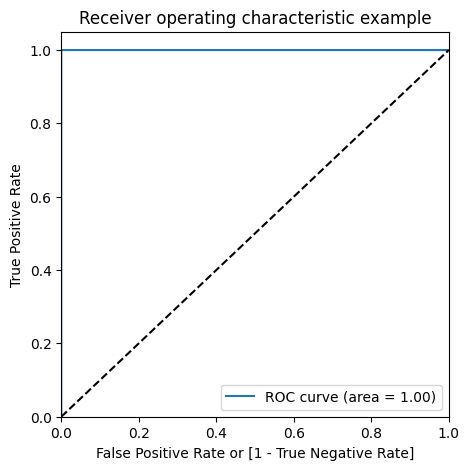

In [137]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on test data

In [138]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 82.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



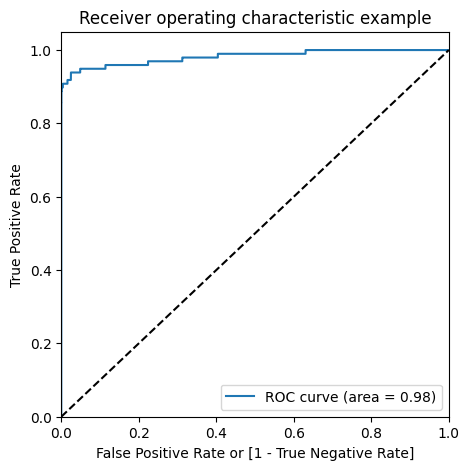

In [139]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 98%
    - F1 score: 82.3%

### Select the oversampling method which shows the best result on a model
We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the  dataset which is balanced with AdaSyn technique. We got ROC score 100% on train data and 99% on the test data and F1 score 100% on train data and 81% in the test data.

Hence, we conclude that the `XGBoost model with Adasyn` is the best model.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


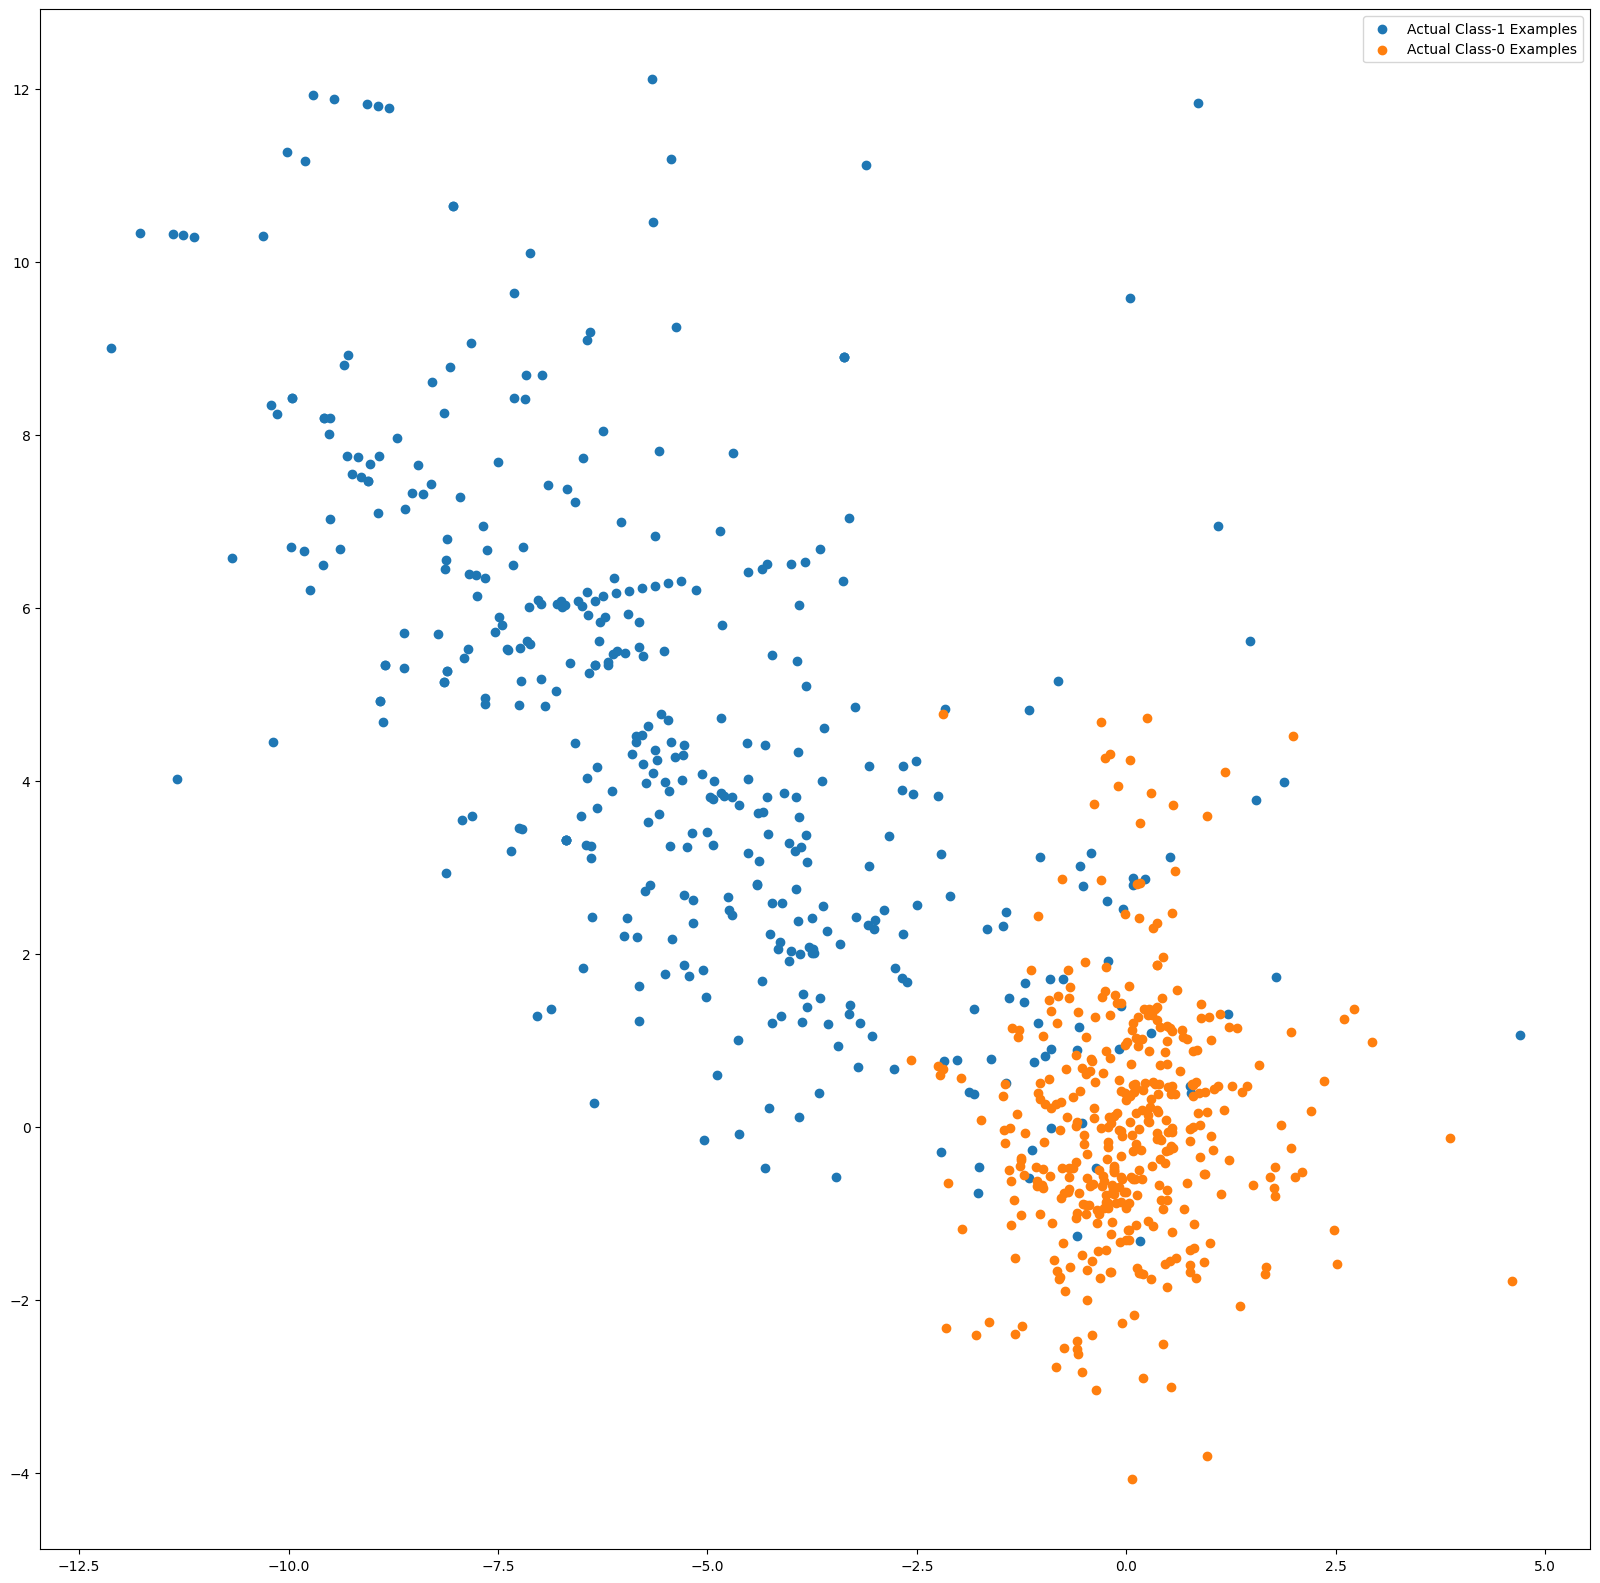

In [140]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [141]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.9223263


We have found that 92% is the threshold for which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data.

# Summary
## Strategic Selection of XGBoost Model for Credit Card Fraud Detection

- Achieving a high recall rate is our main goal in credit card fraud detection. In order to provide a strong defence against prospective high-value fraudulent operations, a high recall is necessary to identify a sizable number of actual fraudulent transactions.


- Prioritising recall becomes a strategic decision to protect banks' financial health as well as the interests of their clients, given the serious repercussions that fraudulent transactions have on financial losses, credibility, and confidence for banking institutions.

## Model Evaluation and Selection Process

Using the power of the ADASYN (Adaptive Synthetic Sampling) technology, we methodically experimented with several machine learning models in our research to balance the extremely unbalanced dataset. Among the models examined, the XGBoost model showed itself to be exceptionally effective. These are the main conclusions:

- **ROC Score:** The XGBoost model exhibited a commendable ROC score, showcasing its ability to effectively distinguish between positive and negative classes.

- **Recall Rate:** The standout feature was the exceptionally high Recall rate in the balanced dataset. This metric is crucial in ensuring that a substantial portion of actual fraudulent transactions is correctly identified.

## Rationale for Choosing XGBoost

- Thus, the XGBoost model combined with the ADASYN approach on a balanced dataset is the best option for our credit card fraud detection solution, according to a thorough review of performance criteria. This calculated move is based on the model's remarkable ROC score delivery as well as its capacity to prioritise recall, which is a crucial component in reducing the negative effects of fraudulent transactions on financial institutions and their customers.


- Through the implementation of the **XGBoost model within the ADASYN** framework, we will be able to improve the proactive monitoring and fraud prevention strategies that banks employ, strengthening their defences against the constantly changing credit card fraud landscape.



<br/>
<br/>
<br/>
<div style="text-align:center; color:red; font-size:102px; font-family:cursive; text-decoration: underline;">-By Somvir Singh!</div>
<br/>
<br/>
<br/>
<br/>